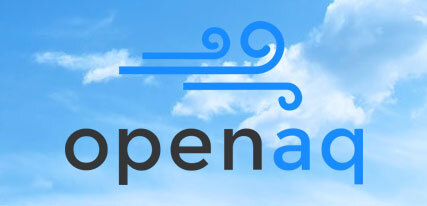

#Using the OpenAQ API in Python

In [5]:
#@title Imports
import requests
import pandas as pd
import json
from io import StringIO, BytesIO
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

In [2]:
pd.set_option('display.max_columns', None)

For this tutorial we will use Python to query the OpenAQ REST API. To make HTTP requests we will use the popular [requests](https://requests.readthedocs.io/en/latest/) library. Any other HTTP library will work, e.g. [httpx](https://www.python-httpx.org/) or even the standard library [urllib](https://docs.python.org/3/library/urllib.html)

## Introduction to the OpenAQ API

OpenAQ maintains a REST API at https://api.openaq.org which provides programmatic access to the OpenAQ database. The API returns results in JSON, a standard format for REST APIs.

#### Data results structure


The OpenAQ API returns a standard JSON object for all endpoints comprised of two main fields: meta and results. ```meta``` contains top level data about the query including results counts and pagination information.  ```results``` holds an array of result data.

```json
{
  "meta":{
    "name":"openaq-api",
    "license":"CC BY 4.0d",
    "website":"api.openaq.org",
    "page":1,
    "limit":100,
    "found":1
  },
  "results":[]
}
```

Depending on the endpoint, the results array will hold a different object type with different fields relevant to the endpoint resource. Reselt types are documented at docs.openaq.org

## How to find locations in a specific geographic area

---


#### Finding locations by country


To query by country use the [ISO 3166-1 alpha-2](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2) two letter code and the country query parameter. The ISO 3166-1 alpha-2 code for United Kingdom is 'gb'

In [3]:
country = 'gb' # ISO 3166-1 alpha-2 country code 

The resulting URL will be: https://api.openaq.org/v2/locations?country=gb

In [4]:
url = f'https://api.openaq.org/v2/locations?country={country}'

Using ```requests``` we can send a GET request to the URL and read the JSON result:

In [5]:
response = requests.get(url)
data = response.json()

By checking the length of the ```results``` object of the response we can see how many locations match our query. _N.B. OpenAQ API defaults to a limit of 100, we will see later how to adjust this limit_

In [6]:
len(data['results'])

100

We can inspect the full request result below:

In [7]:
data

{'meta': {'name': 'openaq-api',
  'license': '',
  'website': '/',
  'page': 1,
  'limit': 100,
  'found': 410},
 'results': [{'id': 433460,
   'city': None,
   'name': 'SL035 Armouries Drive',
   'entity': None,
   'country': 'GB',
   'sources': None,
   'isMobile': False,
   'isAnalysis': None,
   'parameters': [{'id': 133,
     'unit': 'particles/cm³',
     'count': 1090,
     'average': 1.79,
     'lastValue': 1.2,
     'parameter': 'um005',
     'displayName': 'um005 particles/cm³',
     'lastUpdated': '2023-06-03T17:09:03+00:00',
     'parameterId': 133,
     'firstUpdated': '2023-05-23T17:58:06+00:00',
     'manufacturers': None},
    {'id': 1,
     'unit': 'µg/m³',
     'count': 9806,
     'average': 0.0,
     'lastValue': 0.6,
     'parameter': 'pm10',
     'displayName': 'pm10 µg/m³',
     'lastUpdated': '2023-06-03T17:09:03+00:00',
     'parameterId': 1,
     'firstUpdated': '2023-05-08T17:13:23+00:00',
     'manufacturers': None},
    {'id': 2,
     'unit': 'µg/m³',
     'c

#### Finding locations by city

If we are interested in finding locations in a more specific geographic area, such as a city, we can utilize the city parameter:  ```city=```. To ensure we are searching the correct city, it is best to combine city and country for specificity. e.g. There is London in the United Kingdon and London, Ontario, Canada. Simply using ```city=London``` would return locations for both Londons and any other London in the OpenAQ database. 

In [8]:
city = 'London'

In [9]:
url = f'https://api.openaq.org/v2/locations?country={country}&city={city}'

The url will be: https://api.openaq.org/v2/locations?country=gb&city=London

In [10]:
url

'https://api.openaq.org/v2/locations?country=gb&city=London'


Again we can send an HTTP GET request to the OpenAQ API.

In [11]:
london_response = requests.get(url)
london_data = london_response.json()

Checking the length of the results key shows us that there are 13 locations (changes throughout the day)

In [12]:
len(london_data['results'])

16

We can now view the data returned:

In [13]:
london_data

{'meta': {'name': 'openaq-api',
  'license': '',
  'website': '/',
  'page': 1,
  'limit': 100,
  'found': 16},
 'results': [{'id': 60,
   'city': 'London',
   'name': 'Haringey Roadside',
   'entity': None,
   'country': 'GB',
   'sources': None,
   'isMobile': False,
   'isAnalysis': None,
   'parameters': [{'id': 5,
     'unit': 'µg/m³',
     'count': 293,
     'average': 42.599999999999994,
     'lastValue': 17.0,
     'parameter': 'no2',
     'displayName': 'no2 µg/m³',
     'lastUpdated': '2023-06-03T16:00:00+00:00',
     'parameterId': 5,
     'firstUpdated': '2023-05-19T00:00:00+00:00',
     'manufacturers': None}],
   'sensorType': None,
   'coordinates': {'latitude': 51.5993, 'longitude': -0.068218},
   'lastUpdated': '2023-06-03T16:00:00+00:00',
   'firstUpdated': '2023-05-19T00:00:00+00:00',
   'measurements': 293,
   'bounds': [-0.068218, 51.5993, -0.068218, 51.5993],
   'manufacturers': [{'modelName': 'Government Monitor',
     'manufacturerName': 'Unknown Governmental Or

### Filter locations by pollutants (parameters)


The previous query includes locations regardless of the types of parameters. Lets add to our query and narrow the results to one parameter. 



A complete list of parameters supported in the OpenAQ platform can be found at the ```v2/parameters``` endpoint in the API

In [14]:
parameters_response = requests.get('https://api.openaq.org/v2/parameters')
parameters_response.json()

{'meta': {'name': 'openaq-api',
  'license': '',
  'website': '/',
  'page': 1,
  'limit': 100,
  'found': 64},
 'results': [{'id': 1,
   'name': 'pm10',
   'displayName': 'PM10',
   'description': 'Particulate matter less than 10 micrometers in diameter mass concentration',
   'preferredUnit': 'µg/m³'},
  {'id': 2,
   'name': 'pm25',
   'displayName': 'PM2.5',
   'description': 'Particulate matter less than 2.5 micrometers in diameter mass concentration',
   'preferredUnit': 'µg/m³'},
  {'id': 3,
   'name': 'o3',
   'displayName': 'O₃ mass',
   'description': 'Ozone mass concentration',
   'preferredUnit': 'µg/m³'},
  {'id': 4,
   'name': 'co',
   'displayName': 'CO mass',
   'description': 'Carbon Monoxide mass concentration',
   'preferredUnit': 'µg/m³'},
  {'id': 5,
   'name': 'no2',
   'displayName': 'NO₂ mass',
   'description': 'Nitrogen Dioxide mass concentration',
   'preferredUnit': 'µg/m³'},
  {'id': 6,
   'name': 'so2',
   'displayName': 'SO₂ mass',
   'description': 'Sulfu

We can choose a parameter of interest by its ```name``` field and store it in a variable.

In [15]:

#parameter_name = 'pm1' # Particulate matter less than 1 micrometer in diameter mass concentration
#parameter_name = 'pm25' # Particulate matter less than 2.5 micrometers in diameter mass concentration
parameter_name = 'pm10' # Particulate matter less than 10 micrometers in diameter mass concentration


#parameter_name = 'temperature' # Temperatue [deg Cel]
#parameter_name = 'pressure' # Atmospheric or barometric pressure [atm]


#parameter_name = 'co' # Carbon Monoxide mass concentration

Now the url string will include the ```parameter``` query paramter and we will add the pollutant as ```parameter_name``` variable

In [16]:
url = f'https://api.openaq.org/v2/locations?country={country}&city={city}&parameter={parameter_name}'
print(url)

https://api.openaq.org/v2/locations?country=gb&city=London&parameter=pm10


Get a response from our request and store it as a json object.

In [17]:
one_parameter_response = requests.get(url)
one_parameter_data = response.json()

We can see how many sensors locations measure our chosen parameter.

In [18]:
number = len(one_parameter_data['results'])
print(number)

100


In [19]:
one_parameter_data['results']

[{'id': 433460,
  'city': None,
  'name': 'SL035 Armouries Drive',
  'entity': None,
  'country': 'GB',
  'sources': None,
  'isMobile': False,
  'isAnalysis': None,
  'parameters': [{'id': 133,
    'unit': 'particles/cm³',
    'count': 1090,
    'average': 1.79,
    'lastValue': 1.2,
    'parameter': 'um005',
    'displayName': 'um005 particles/cm³',
    'lastUpdated': '2023-06-03T17:09:03+00:00',
    'parameterId': 133,
    'firstUpdated': '2023-05-23T17:58:06+00:00',
    'manufacturers': None},
   {'id': 1,
    'unit': 'µg/m³',
    'count': 9806,
    'average': 0.0,
    'lastValue': 0.6,
    'parameter': 'pm10',
    'displayName': 'pm10 µg/m³',
    'lastUpdated': '2023-06-03T17:09:03+00:00',
    'parameterId': 1,
    'firstUpdated': '2023-05-08T17:13:23+00:00',
    'manufacturers': None},
   {'id': 2,
    'unit': 'µg/m³',
    'count': 9806,
    'average': 0.0,
    'lastValue': 0.2,
    'parameter': 'pm25',
    'displayName': 'pm25 µg/m³',
    'lastUpdated': '2023-06-03T17:09:03+00:0

Lets look at the first location's data. Each location has different parameters, but only locations that contain the queried parameter are included.

In [20]:
location_no = 0
one_parameter_data['results'][location_no]

{'id': 433460,
 'city': None,
 'name': 'SL035 Armouries Drive',
 'entity': None,
 'country': 'GB',
 'sources': None,
 'isMobile': False,
 'isAnalysis': None,
 'parameters': [{'id': 133,
   'unit': 'particles/cm³',
   'count': 1090,
   'average': 1.79,
   'lastValue': 1.2,
   'parameter': 'um005',
   'displayName': 'um005 particles/cm³',
   'lastUpdated': '2023-06-03T17:09:03+00:00',
   'parameterId': 133,
   'firstUpdated': '2023-05-23T17:58:06+00:00',
   'manufacturers': None},
  {'id': 1,
   'unit': 'µg/m³',
   'count': 9806,
   'average': 0.0,
   'lastValue': 0.6,
   'parameter': 'pm10',
   'displayName': 'pm10 µg/m³',
   'lastUpdated': '2023-06-03T17:09:03+00:00',
   'parameterId': 1,
   'firstUpdated': '2023-05-08T17:13:23+00:00',
   'manufacturers': None},
  {'id': 2,
   'unit': 'µg/m³',
   'count': 9806,
   'average': 0.0,
   'lastValue': 0.2,
   'parameter': 'pm25',
   'displayName': 'pm25 µg/m³',
   'lastUpdated': '2023-06-03T17:09:03+00:00',
   'parameterId': 2,
   'firstUpda

We can also inspect the parameter entry from the object and get from descriptive statistics about the values.

If there are no matching items or the list or dictionary structure differs from what is assumed, it may result in a StopIteration exception or a KeyError.

In [21]:
cnt = 0
for i in range(number):
    try:
        next(item for item in one_parameter_data['results'][i]['parameters'] if item['parameter'] == parameter_name)
    except StopIteration:
        print(f"No matching data for '{parameter_name}'' found for location no =", i)
        cnt += 1

if (cnt == 0):
    print(f"'{parameter_name}' data is found for all locations in {city},{country}")


'pm10' data is found for all locations in London,gb


## How to find locations within an arbitrary geographic area (very useful)

In addition to searching by country or city the API supports querying by geographic coordinates paired with a radius. To follow up on our previous example let's suppose we want to find locations in _and_ around London, UK. We could look up the city names of all the nearby cities, but using a geographic query is much more convenient.

The OpenAQ API accepts coordinates as a WGS84 latitude, longitude pair.

The coordinates for London, UK are 51.5074° N, -0.1278° E.


The radius parameters allows searching around the coordinate point in meters. We will set a 70,000 meter (70km) radius around the central London coordinate.

In [6]:
coordinates = [51.5074,-0.1278]
radius = 70000 # meters

In [7]:
url = f'https://api.openaq.org/v2/locations?coordinates={coordinates[0]},{coordinates[1]}&radius={radius}'

In [8]:
response = requests.get(url)
data = response.json()

In [9]:
response.url

'https://api.openaq.org/v2/locations?coordinates=51.5074,-0.1278&radius=70000'

In [10]:
latest = response.json()['results']

In [11]:
len(data['results'])

100

In [12]:
data['results']

[{'id': 293499,
  'city': None,
  'name': 'Greenglade 2',
  'entity': None,
  'country': 'GB',
  'sources': None,
  'isMobile': False,
  'isAnalysis': None,
  'parameters': [{'id': 19,
    'unit': 'µg/m³',
    'count': 12621,
    'average': 3.0,
    'lastValue': 3.7,
    'parameter': 'pm1',
    'displayName': 'pm1 µg/m³',
    'lastUpdated': '2023-06-03T19:34:03+00:00',
    'parameterId': 19,
    'firstUpdated': '2023-05-08T17:12:48+00:00',
    'manufacturers': None},
   {'id': 129,
    'unit': 'particles/cm³',
    'count': 1707,
    'average': 0.01,
    'lastValue': 0.0,
    'parameter': 'um050',
    'displayName': 'um050 particles/cm³',
    'lastUpdated': '2023-06-03T19:34:03+00:00',
    'parameterId': 129,
    'firstUpdated': '2023-05-23T18:00:47+00:00',
    'manufacturers': None},
   {'id': 130,
    'unit': 'particles/cm³',
    'count': 12621,
    'average': 0.02,
    'lastValue': 0.02,
    'parameter': 'um025',
    'displayName': 'um025 particles/cm³',
    'lastUpdated': '2023-06-0

Above we see if we made a fruitful query if "results" has content. If not, try a larger radius.

In [29]:
locations = pd.DataFrame.from_dict([{"city": row['city'], "entity":row['entity'], "name":row['name'], 'id': row['id']} for row in data['results']])            

In [30]:
for i in range(len(locations['id'])):
    print(f"{locations['name'][i]}, {locations['id'][i]}")

AGWood, 353842
Smarden (outdoors), 69794
Virginia Water, 288337
Greenglade 2, 293499
Freshfield Lane, 357010
Crondall Weather, 62604
Alliances 4 Less Luton_1, 71447
Appleton Farm Oast Frittenden Kent UK, 69965
Garden Mead, West Hoathly, 234485
LionFreta-BXH, 613094
Allington A20 KENT, 73060
Churchwood, Fittleworth, West Sussex, RH20 1HP, UK, 62438
Leatherhead, 62444
Monks Farm, Upminster, 235016
Harlington, 582053
London Borough of Newham, Upton Park, 73049
Horsham, 73057
St Albans St Julians, 270482
North West London, 62570
Windsor, 69795
Acton, 65995
Newham, Upton Park, 1010097
Beaconsfield , 67540
Tring, Hertfordshire, 227723
Fulham Riverside, 65568
Camden Kerbside, 152
London Westminster, 159
London Haringey Priory Park South, 150
Thurrock, 2395
Stanford-le-Hope Roadside, 2489
Horley, 2541
London Bloomsbury, 148
Storrington Roadside, 794
Rochester Stoke, 2558
London Harlington, 141
Haringey Roadside, 60
Chatham Roadside, 2560
Tower Hamlets Roadside, 151
Southwark A2 Old Kent Road, 

## How to get measurements for a specific location (very useful)

---


To access measurments from OpenAQ we will use the ```/v2/measurements``` endpoint. Theres a number of ways to filter results from the ```/v2/measurements``` but for this example we can query measurements from a single location


Once you have the ```location_id```, you can get data from a single sensor location. We can store the variable here as **location_id**.

In [13]:
#location_id = 225743  # City of London - Farringdon Street
#location_id = 270693 # Waterloo Place (The Crown Estate)
location_id = 225837 # Sutton - Worcester Park

To filter to a single location use the ```location_id=``` query parameter:

In [14]:
url = f'https://api.openaq.org/v2/measurements?location_id={location_id}'

In [15]:
url

'https://api.openaq.org/v2/measurements?location_id=225837'

Send a GET request:

In [16]:
response = requests.get(url)
our_location = response.json()


View the results

In [17]:
our_location

{'meta': {'name': 'openaq-api',
  'license': '',
  'website': '/',
  'page': 1,
  'limit': 100,
  'found': 24296},
 'results': [{'locationId': 225837,
   'location': 'Sutton - Worcester Park',
   'parameter': 'no2',
   'value': 45.2,
   'date': {'utc': '2021-04-30T00:00:00+00:00',
    'local': '2021-04-30T01:00:00+01:00'},
   'unit': 'µg/m³',
   'coordinates': {'latitude': 51.377923, 'longitude': -0.240414},
   'country': 'NA',
   'city': None,
   'isMobile': False,
   'isAnalysis': False,
   'entity': 'Governmental Organization',
   'sensorType': 'reference grade'},
  {'locationId': 225837,
   'location': 'Sutton - Worcester Park',
   'parameter': 'no2',
   'value': 32.1,
   'date': {'utc': '2021-04-30T01:00:00+00:00',
    'local': '2021-04-30T02:00:00+01:00'},
   'unit': 'µg/m³',
   'coordinates': {'latitude': 51.377923, 'longitude': -0.240414},
   'country': 'NA',
   'city': None,
   'isMobile': False,
   'isAnalysis': False,
   'entity': 'Governmental Organization',
   'sensorType'

In this basic example we have limited the reponse to 100, which is the default limit. The OpenAQ API returns measurements in descending order, so the results above are the 100 most recent measurments.


In the example above we have queried for every measurement for the location. To filter the results down to a specific time period of interest we can use the ```data_from=``` and ```date_to=``` parameters. 

Dates must be in the [ISO-8601](https://en.wikipedia.org/wiki/ISO_8601) date time + offset format e.g.```2000-01-01T00:00:00+00:00```, which is January 1 2000 12:00 AM at UTC. Let's define our query parameters as we did before.

In [18]:
params = {
    'location_id': location_id,
    'date_from': '2023-05-15T00:00:00+00:00', #ISO 8601 datetime format
    'date_to': '2023-06-02T23:59:00+00:00',
    'limit': 5000
}

In [19]:
base_url = 'https://api.openaq.org/v2/measurements'
response = requests.get(base_url, params=params)

In [20]:
our_location_data = response.json()

In [21]:
our_location_data

{'meta': {'name': 'openaq-api',
  'license': '',
  'website': '/',
  'page': 1,
  'limit': 5000,
  'found': 844},
 'results': [{'locationId': 225837,
   'location': 'Sutton - Worcester Park',
   'parameter': 'no2',
   'value': 4.3,
   'date': {'utc': '2023-05-15T01:00:00+00:00',
    'local': '2023-05-15T02:00:00+01:00'},
   'unit': 'µg/m³',
   'coordinates': {'latitude': 51.377923, 'longitude': -0.240414},
   'country': 'NA',
   'city': None,
   'isMobile': False,
   'isAnalysis': False,
   'entity': 'Governmental Organization',
   'sensorType': 'reference grade'},
  {'locationId': 225837,
   'location': 'Sutton - Worcester Park',
   'parameter': 'no2',
   'value': 2.0,
   'date': {'utc': '2023-05-15T02:00:00+00:00',
    'local': '2023-05-15T03:00:00+01:00'},
   'unit': 'µg/m³',
   'coordinates': {'latitude': 51.377923, 'longitude': -0.240414},
   'country': 'NA',
   'city': None,
   'isMobile': False,
   'isAnalysis': False,
   'entity': 'Governmental Organization',
   'sensorType': '

Use list comprehension to turn json into a dictionary. The desired keys will become columns and their values will be rows.

In [22]:
measurements = [{"date": row['date']['local'], "value":row['value'], "parameter":row["parameter"], "unit":row["unit"]} for row in our_location_data['results']]

Turn a dict into a Data Frame.

In [23]:
df = pd.DataFrame.from_dict(measurements)

In [24]:
df.shape

(844, 4)

The following shows what types of pollutants does the sensor at that location measure

In [25]:
df['parameter'].value_counts()

no2     422
pm10    422
Name: parameter, dtype: int64

In [26]:
df

,date,value,parameter,unit
0,2023-05-15T02:00:00+01:00,4.3,no2,µg/m³
1,2023-05-15T03:00:00+01:00,2.0,no2,µg/m³
2,2023-05-15T04:00:00+01:00,0.3,no2,µg/m³
3,2023-05-15T05:00:00+01:00,3.3,no2,µg/m³
4,2023-05-15T06:00:00+01:00,11.5,no2,µg/m³
...,...,...,...,...
839,2023-06-02T18:00:00+01:00,14.1,pm10,µg/m³
840,2023-06-02T19:00:00+01:00,18.7,pm10,µg/m³
841,2023-06-02T20:00:00+01:00,18.0,pm10,µg/m³
842,2023-06-02T21:00:00+01:00,17.6,pm10,µg/m³


Turn the 'date' column strings into a datetime objects.

In [27]:
df['date'] = pd.to_datetime(df['date'])

Lets create a chart for one parameter (pm25). 
First we will make a new dataframe that only has pm25 as a parameter. Then we will set the index to the timestamp. Plots will chart the index on the x axis by default.

In [30]:
pm25 = df[df['parameter']=='pm10']
pm25.set_index('date', inplace=True)
pm25.head(3)

,value,parameter,unit
date,,,
2023-05-15 02:00:00+01:00,7.3,pm10,µg/m³
2023-05-15 03:00:00+01:00,4.5,pm10,µg/m³
2023-05-15 04:00:00+01:00,4.5,pm10,µg/m³


Lets make a chart. By default, the plot will use the index (date) as the x axis and *numeric* data as the y axis.

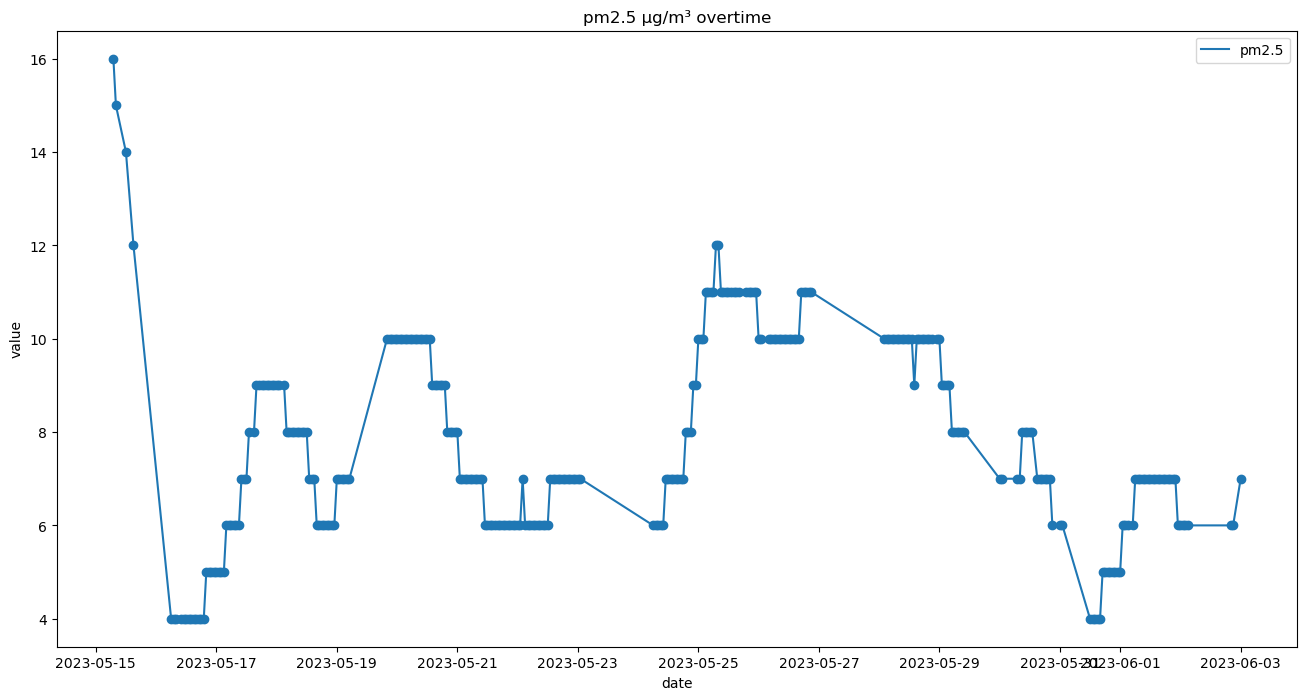

In [596]:
#@title Plot a PM2.5 chart!
plt.figure(figsize=[16,8])        #set the size of the chart
plt.plot(pm25.index, pm25['value']) # same for pm25
plt.scatter(pm25.index, pm25['value'])
plt.legend(['pm2.5'])       # make a lengend so we know what the colors mean
plt.xlabel('date')
plt.ylabel('value')
plt.title('pm2.5 µg/m³ overtime')

plt.show()

Lets compare it to pm10. First create a dataframe for pm10.

In [597]:
pm10 = df[df['parameter'] == 'pm10']

pm10.set_index('date', inplace=True)

pm10.head(3)

,value,parameter,unit
date,,,
2023-05-15 07:00:00+01:00,20.0,pm10,µg/m³
2023-05-15 08:00:00+01:00,19.0,pm10,µg/m³
2023-05-15 12:00:00+01:00,18.0,pm10,µg/m³


Make a comparison chart:

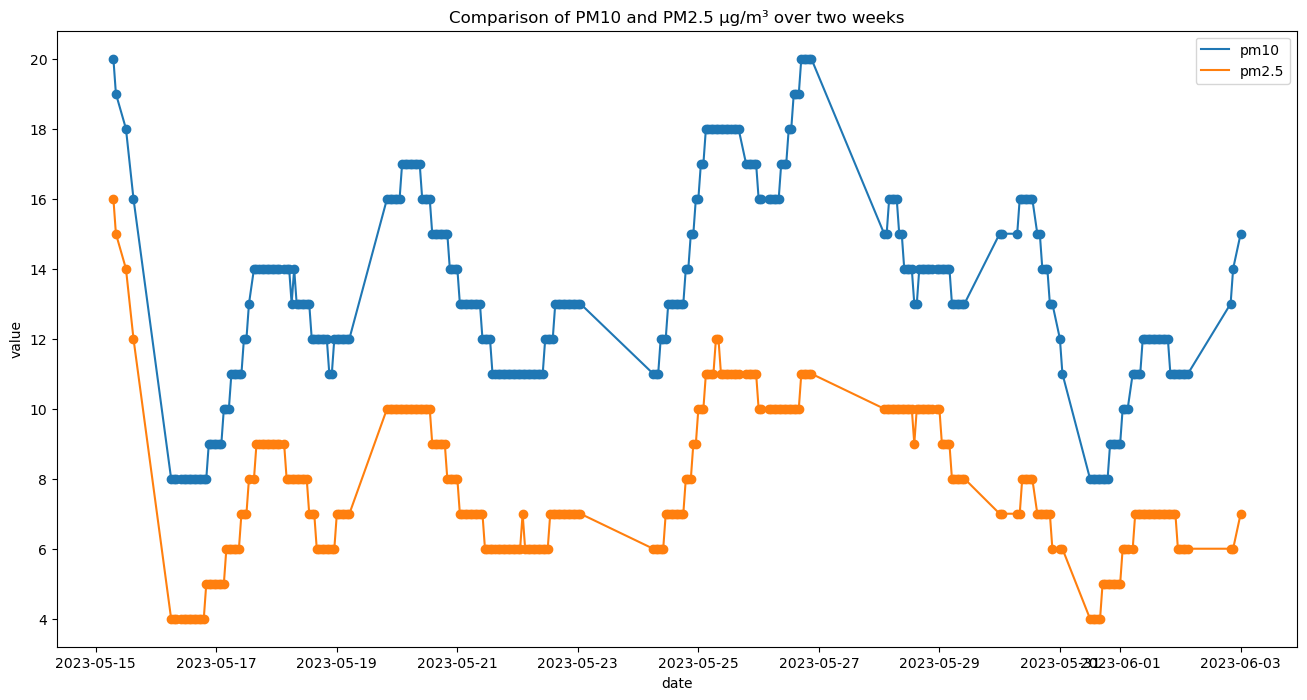

In [598]:
#@title Plot a comparison chart!
plt.figure(figsize=[16,8])        #set the size of the chart
plt.plot(pm10.index, pm10['value']) # setup a chart for pm10 with x and y assigned respectively
plt.plot(pm25.index, pm25['value']) # same for pm25
plt.scatter(pm10.index, pm10['value']) # superimpose scatter plots
plt.scatter(pm25.index, pm25['value'])
plt.legend(['pm10', 'pm2.5'])       # make a lengend so we know what the colors mean
plt.xlabel('date')
plt.ylabel('value')
plt.title('Comparison of PM10 and PM2.5 µg/m³ over two weeks')

plt.show()

## How to get the latest measurement for a specific location (very useful as well)

---


In addition to querying measurements during a specific time the API also provides a ```/latest``` endpoint which provides a convenience method to only get the most recent measurement. This can be particularly helpful if you wish to poll the API and display the resultsas they are updated.

We will use the same location a before

In [599]:
location_id = 225837

and plug it into the ```/v2/latest``` as a positional argument:

In [600]:
url = f'https://api.openaq.org/v2/latest/{location_id}'
response = requests.get(url)

In [601]:
response.url

'https://api.openaq.org/v2/latest/225837'

In [602]:
latest = response.json()['results']

If we inspect the results we'll see a single measurement value for all parameters measurement by this location:

In [603]:
latest

[{'location': 'Sutton - Worcester Park',
  'city': 'Sutton',
  'country': 'GB',
  'coordinates': {'latitude': 51.377923, 'longitude': -0.240414},
  'measurements': [{'parameter': 'no2',
    'value': 10.9,
    'lastUpdated': '2023-06-03T15:00:00+00:00',
    'unit': 'µg/m³'},
   {'parameter': 'pm10',
    'value': 19.5,
    'lastUpdated': '2023-06-03T15:00:00+00:00',
    'unit': 'µg/m³'}]}]

Use list comprehension we can organize the measurements into a dictionary

In [604]:
latest_dict = [{"value":row['value'], "parameter":row["parameter"], "unit":row["unit"]} for row in latest[0]['measurements']]

Make a dataframe as latest_df

In [605]:
latest_df = pd.DataFrame.from_dict(latest_dict)

What units and parameters are in it?

In [606]:
latest_df.value_counts()

value  parameter  unit 
10.9   no2        µg/m³    1
19.5   pm10       µg/m³    1
dtype: int64

Lets make 2 dataframes that each have different units 

In [607]:
ug_per_m3 = latest_df[latest_df.unit == 'µg/m³']
#pm_per_cm3 = latest_df[latest_df.unit == 'particles/cm³']

In [608]:
ug_per_m3

,value,parameter,unit
0,10.9,no2,µg/m³
1,19.5,pm10,µg/m³


In [609]:
#pm_per_cm3

,value,parameter,unit


Create a chart that has the parameters and their units on the x axis

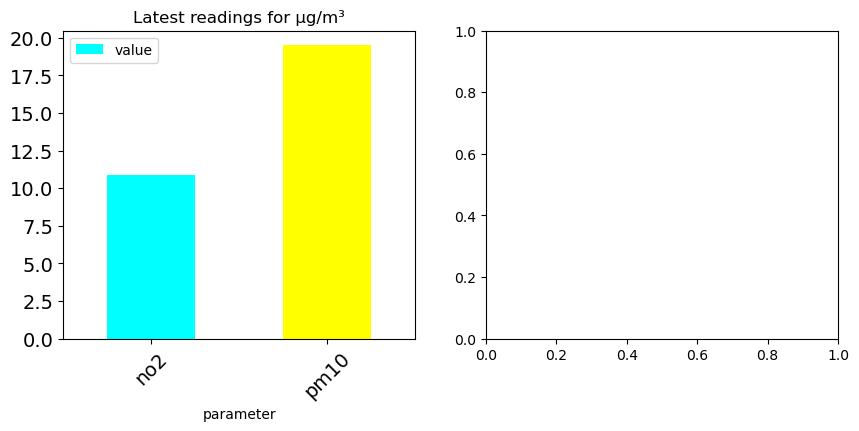

In [610]:
#@title Chart the latest measurements!
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ug_per_m3.plot('parameter', 'value', kind='bar',
               color=["cyan", 'yellow', 'purple'],
               fontsize=14,title='Latest readings for µg/m³',
               rot=45,ax=ax[0])

# pm_per_cm3.plot('parameter', 'value',kind='bar',
#                color=["gold", "pink", "blue"],
#                fontsize=14,title='Latest readings for particles/cm³',
#                rot=45,ax=ax[1])

plt.show()

## Pagination

The OpenAQ system holds a lot of data, sometimes more than you will want to consume in a single request. The API limits the results array to 10,000 results and defaults to 100 results. If we would like to get every location in the OpenAQ (theres ~43,000 in total) we must make multiple requests. Pagination can help make this easier

In [ ]:
base_url = 'https://api.openaq.org/v2/locations'

To start we can create query parameters as follows:


In [ ]:
params = {
    "limit": 1000,
    "page": 1
}

In [ ]:
response = requests.get(base_url, params=params)

This will return the first 1000 locations.

In [ ]:
len(response.json()['results'])

315

If we inspect the ```meta``` object of the result we can see that there are 46296 results in total. Page 1 includes the first 1000 results or the total 46296.

In [ ]:
response.json()['meta']

{'name': 'openaq-api',
 'license': 'CC BY 4.0d',
 'website': 'api.openaq.org',
 'page': 47,
 'limit': 1000,
 'found': 46315}

We can inspect the name of the first location result on page 1.

In [ ]:
response.json()['results'][0]['name']


'Graz Süd Tiergartenweg'

Because we now know there are 46296 results in total, we know there are 46 pages with 1000 results each and a final page 47 with the remainder 296 locations.

In [ ]:
params['page'] = 47

In [ ]:
response = requests.get(base_url, params=params)

We can inspect the name of the first location result on page 2. 

In [ ]:
response.json()['results'][0]['name']

'Graz Süd Tiergartenweg'